
# Old Car Price Prediction

### About Data   


* This dataset  contains informaion about the 100 cars with  the following columns:



1.  Car_ID: Unique identifier for each car
2.  Brand: Car Brand
3.  Model: Car  model
4.  year: Year of manufacture
5.  kilometers_Driven:Number of Kilometers driven
6.  Fuel_Type: Type of fule (e.g., petrol,diesel)
7.  Transmission: Type of transmission (Manual or Automatic)
8.  Owner_Type: Type of owner (e.g., First Second)
9.  Mileage: Mileage in Kilometers per liter
10. Engine: Engine capacity in cc
11. Power: Power of the car in bhp
12. Seats: Number of seats
13. Price: Price of the car in the local currency







#**Problem Statement**

###Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such as Brand, Model, Kilometers_Driven, Fuel_Type,Transmission, Owner_Type, Mileage, Engine, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.

#1.Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Import Dataset




In [ ]:
df=pd.read_csv('/content/drive/MyDrive/My Machine Learning/My_regression/cars.csv')

In [ ]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


#3.Data Checks to Perform



1.   Check Missing values
2.   Check Duplicates
3.   Check data type
4.   Check the number of unique values of each column
5.   Check statistics of the dataset
6.   Check various categories present in the different categorical columns



In [ ]:
# Check the Missing Values

df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
#Check Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [ ]:
#Check the number of unique values of each column
df.nunique()

Car_ID               100
Brand                 11
Model                 58
Year                   6
Kilometers_Driven     18
Fuel_Type              2
Transmission           2
Owner_Type             3
Mileage               15
Engine                36
Power                 40
Seats                  3
Price                 31
dtype: int64

In [ ]:
# Check statistics of the dataset
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


# Insights from Statistics

1. Car Variety 🚗🚙:
        
         Dataset covers 58 car models, each unique in attributes.






<Axes: xlabel='Price', ylabel='Density'>

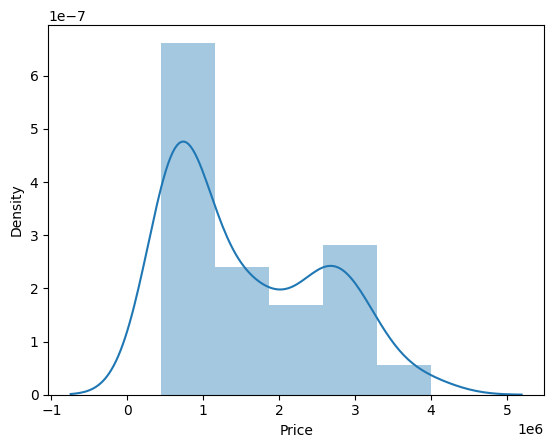

In [ ]:
sns.distplot(df['Price'])

###  Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. In My Project Price column is continuous column so this column has a log distribution  so that I convert log distribution into normal distribution

Removing unwanted Columns

In [ ]:
df=df.drop('Car_ID',axis=1)

In [ ]:
df.head(1)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000


In [ ]:
df['Brand'].value_counts()

Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

# 4.Data Visualization

<Axes: xlabel='count', ylabel='Brand'>

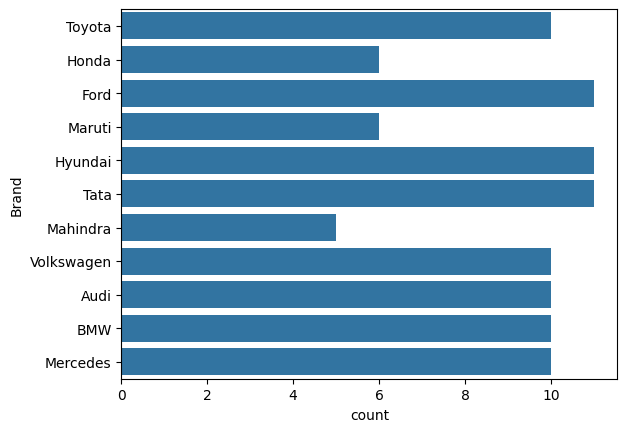

In [ ]:
sns.countplot(df['Brand'])

### Observation :

1. Ford,Hyundai and Tata are most frequent brands
2. Mahindra has the lowest count among all the brands listed  



In [ ]:
group_1=df.groupby(['Brand','Price']).size().reset_index()


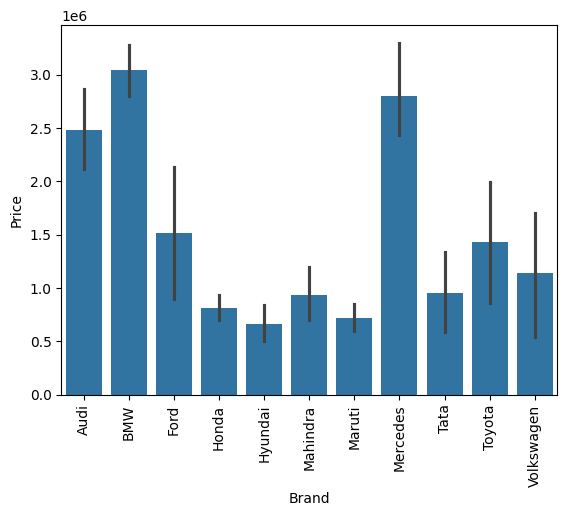

In [ ]:
sns.barplot(x='Brand',y='Price',data=group_1)
plt.xticks(rotation='vertical')
plt.show()

### Observation:
  The Brad BMW has a highest price and Hyundai has a lowest price

In [ ]:
model=df['Model'].nunique()


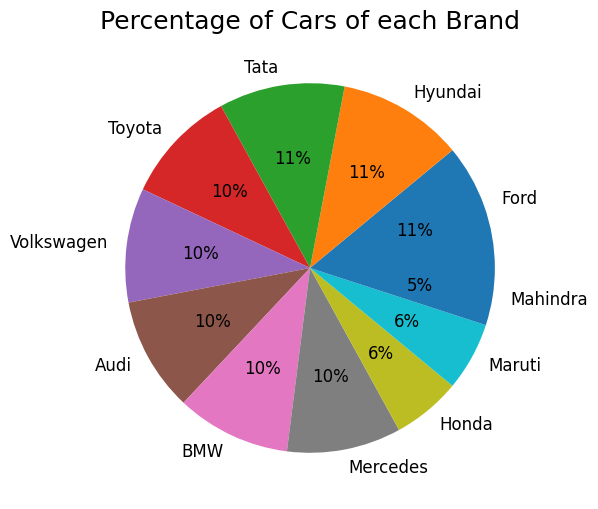

In [ ]:
df['Brand'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=12,figsize=(10,6))
plt.title("Percentage of Cars of each Brand",fontsize=18)
plt.ylabel("")
plt.show()

### Observation:
 The pie chart shows the percentage distribution of cars among various brands. Here are some key observations:

1. Most Common Brands: Tata, Hyundai, and Ford each account for the highest percentage of cars, at 11% each.

2. Moderately Common Brands: Toyota, Volkswagen, Audi, BMW, and Mercedes each have a 10% share of the cars.

3. Least Common Brands: Honda and Maruti each hold a 6% share, while Mahindra has the smallest share at 5%.




In summary, Tata, Hyundai, and Ford are the most prevalent brands in this distribution, while Mahindra is the least common.



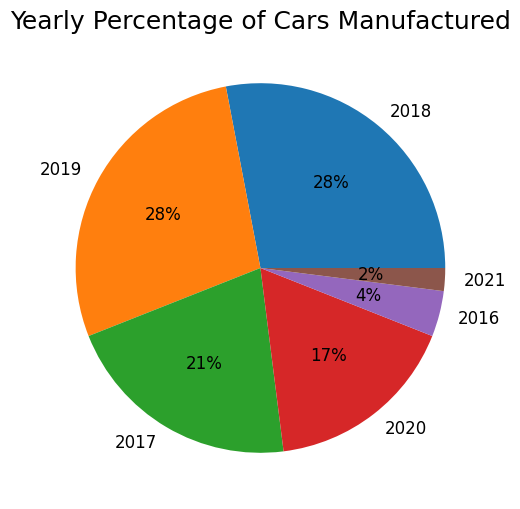

In [ ]:
df['Year'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=12,figsize=(10,6))
plt.title("Yearly Percentage of Cars Manufactured",fontsize=18)
plt.ylabel("")
plt.show()

### Observation :

1. 2018 and 2019 each account for the largest share, with 28% of cars    
   manufactured in each of these years.
2. 2017 follows with 21%.
3. 2020 accounts for 17%.
4. 2016 and 2021 have the smallest shares, with 4% and 2% respectively.

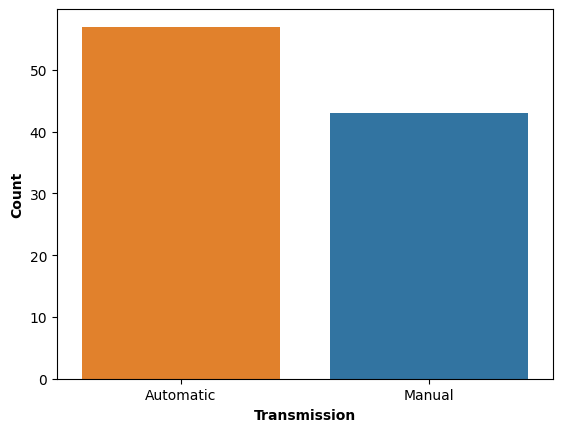

In [ ]:
sns.countplot(data=df,x='Transmission',hue='Transmission',order=df['Transmission'].value_counts().index)
plt.xlabel("Transmission",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

### Observation:
 1. The mostly cars has a  Automatic Transmission

In [ ]:
brands=df['Brand'].unique()

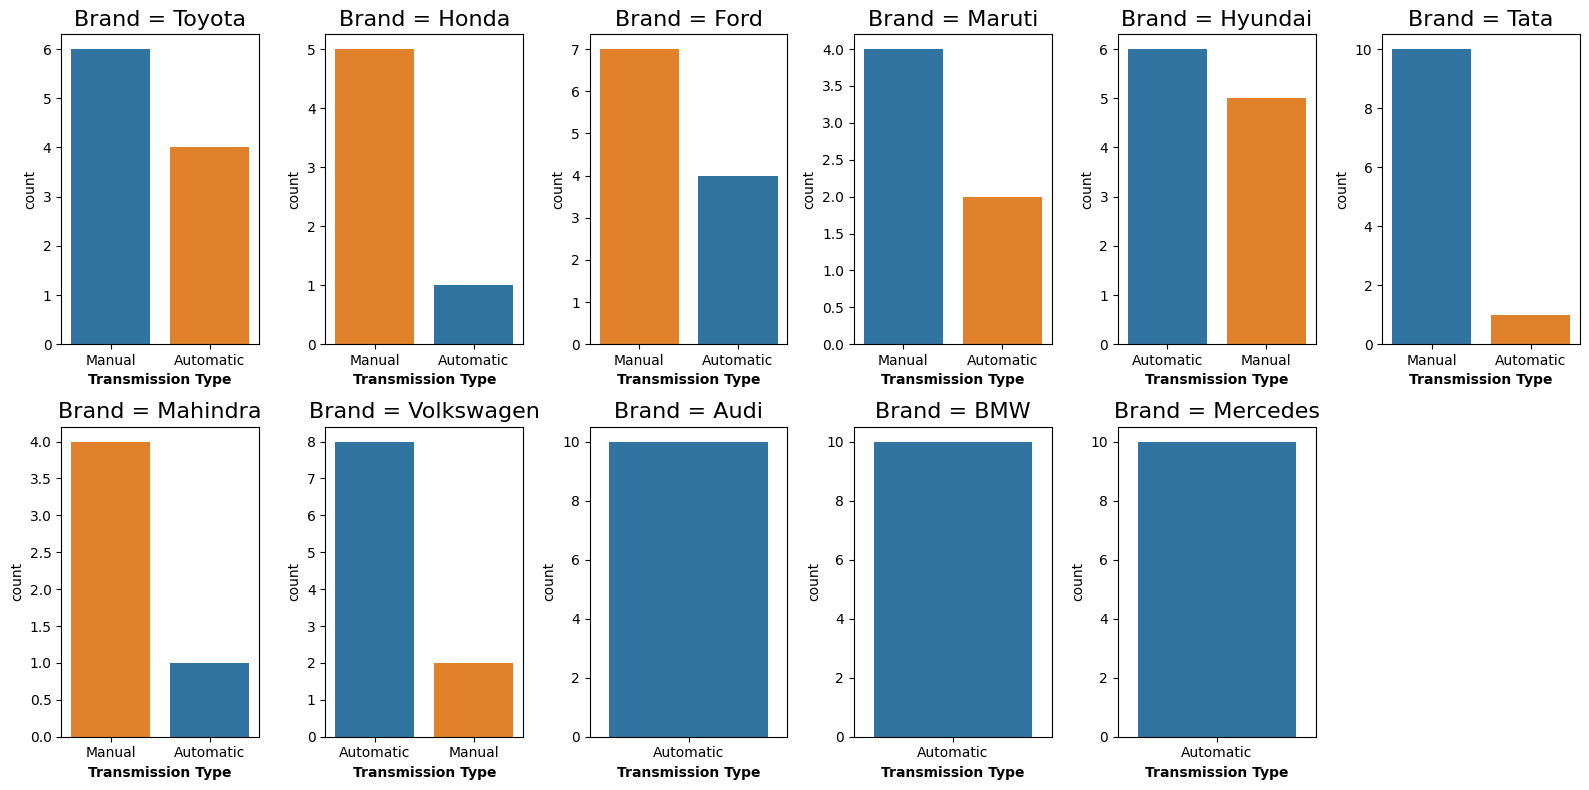

In [ ]:
plt.figure(figsize=(16,8))
# Sets the overall size of the figure to 16 inches in width and 8 inches in height.
for i,brand in enumerate(brands): #Iterate over each index i and brand in the list of brands
    data = df.loc[df['Brand']==brand]
    #Filters the DataFrame df to get rows where the 'Brand' column matches the current brand.
    plt.subplot(2,6,i+1)
    #Creates a subplot in a 2x6 grid (2 rows and 6 columns). The index i+1 ensures that subplots are numbered sequentially from 1 to 12 (assuming there are 12 brands).
    sns.countplot(data=data,x='Transmission',hue='Transmission',order=data['Transmission'].value_counts().index)
    #Creates a count plot within the current subplot (plt.subplot(2, 6, i+1)).
    #It counts occurrences of each 'Transmission' type within the filtered data DataFrame.
    #hue='Transmission' ensures that bars are differentiated by 'Transmission' type.
    #order=data['Transmission'].value_counts().index orders the bars by the count of each 'Transmission' type in descending order.
    plt.title(f"Brand = {brand}",fontsize=16)
    plt.xlabel("Transmission Type",fontweight="bold")
plt.tight_layout()
plt.show()

### Observation:


1.  Toyota: More cars have manual transmissions compared to automatic.
2.  Honda: Manual transmissions are significantly more common than automatic.
3.  Ford: Manual transmissions are more prevalent than automatic.
4.  Maruti: Manual transmissions are more common than automatic.
5.  Hyundai: Automatic transmissions are slightly more common than manual.
6.  Tata: Manual transmissions are overwhelmingly more common than automatic.
7.  Mahindra: Manual transmissions are more common than automatic.
8.  Volkswagen: Automatic transmissions are more common than manual.
9.  Audi: All cars have automatic transmissions.
10. BMW: All cars have automatic transmissions.
11. Mercedes: All cars have automatic transmissions.

Overall, the preference for transmission type varies by brand, with some brands favoring manual transmissions and others favoring automatic transmissions.



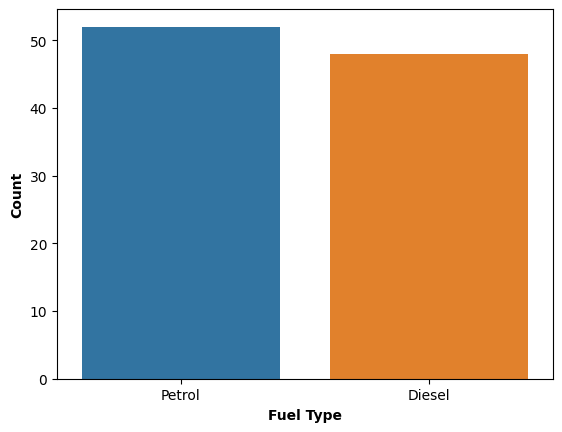

In [ ]:
sns.countplot(data=df,x='Fuel_Type',hue='Fuel_Type',order=df['Fuel_Type'].value_counts().index)
plt.xlabel("Fuel Type",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.show()

### Observation:

Mostly cars use petrol as a Fule

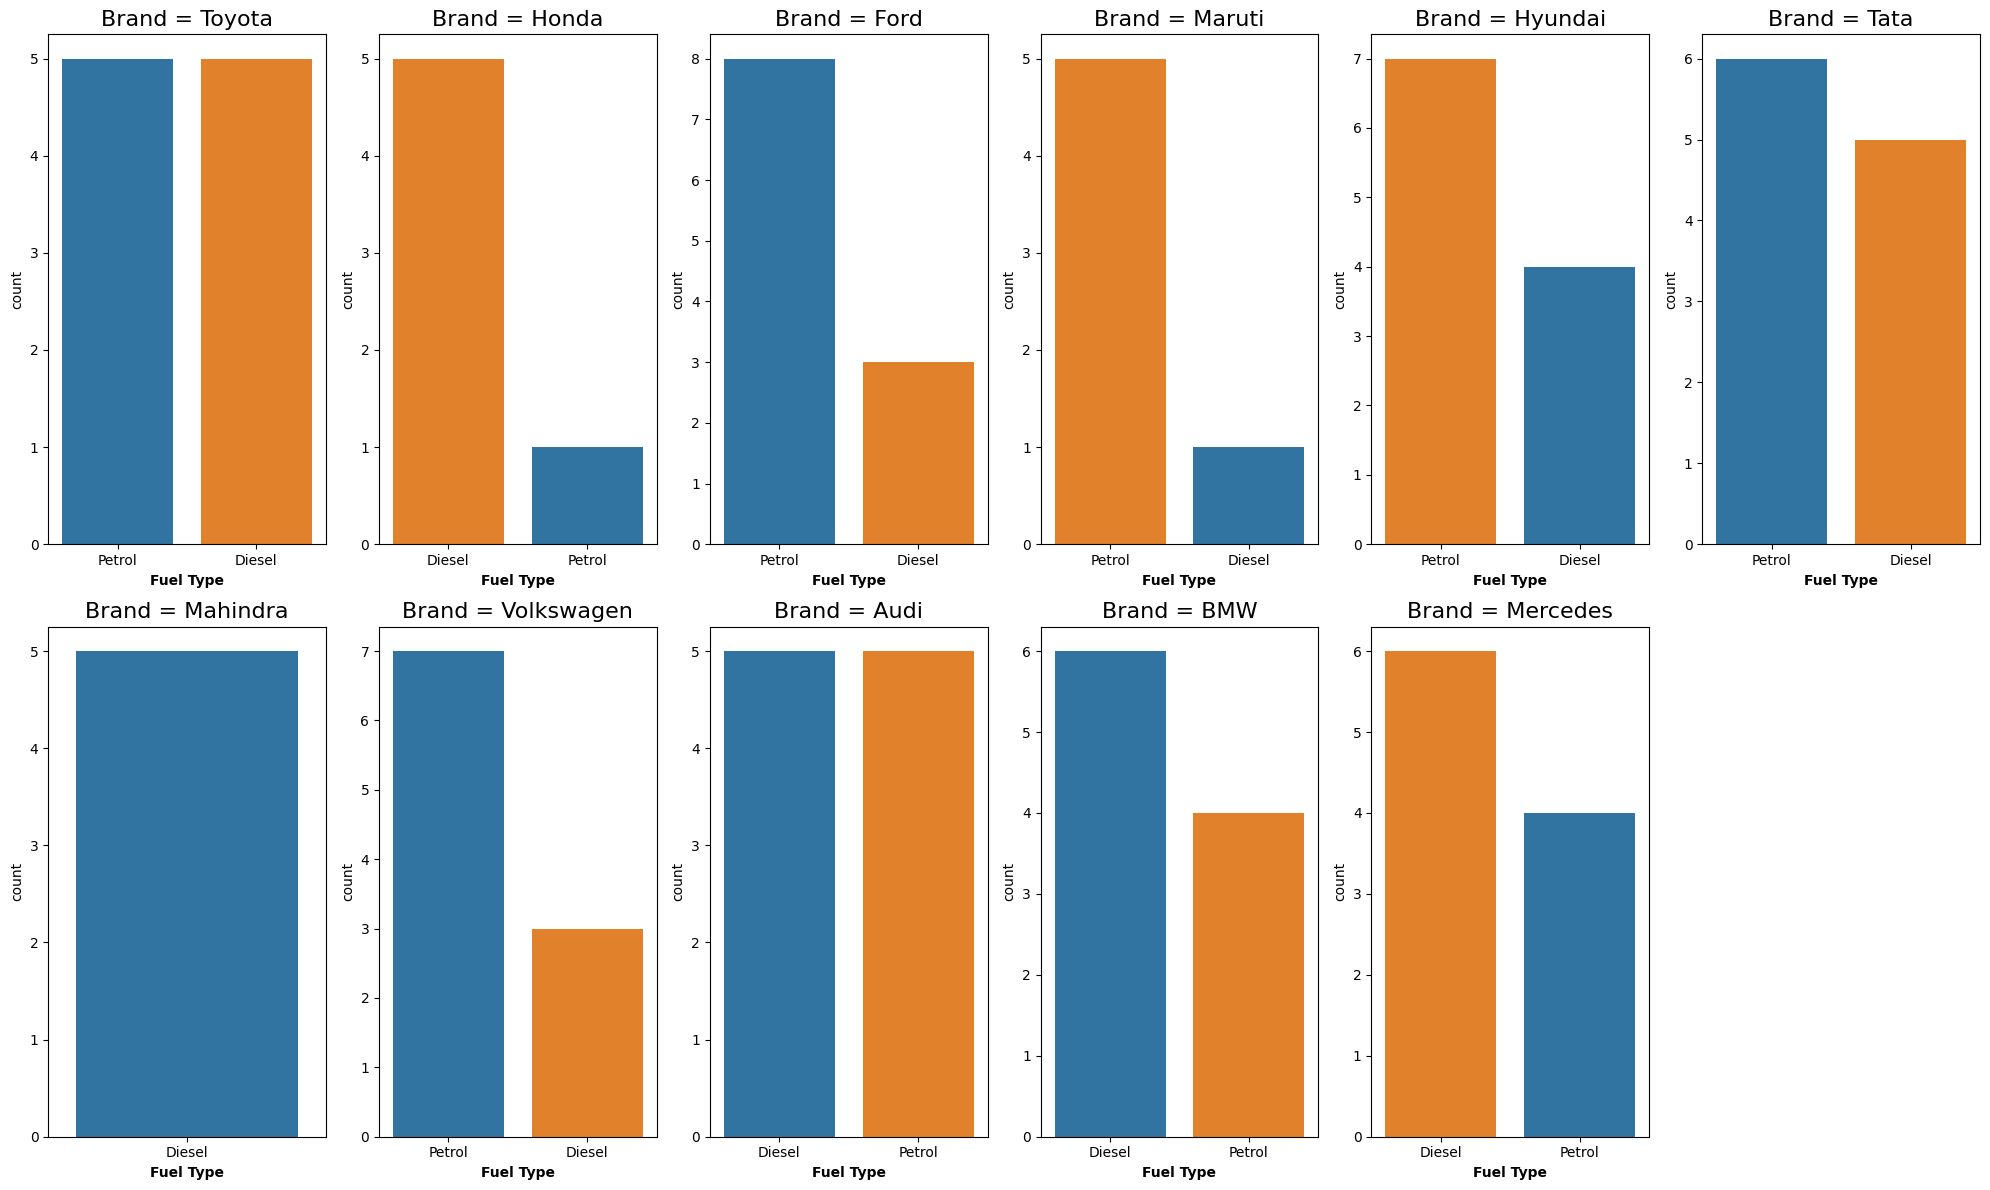

10


In [ ]:
brands = df['Brand'].unique() #fetches unique brands from the 'Brand' column of the datafram
plt.figure(figsize=(20,12))
for i,brand in enumerate(brands):
   # Iterates through each unique brand, where i is the index and brand is the brand name.
    data = df.loc[df['Brand']==brand]
    # Filters the dataframe df to get rows where the 'Brand' column matches the current brand in the loop.
    plt.subplot(2,6,i+1)
    #  Sets up a subplot grid of 2 rows and 6 columns. i+1 ensures that subplots are plotted sequentially from 1 to 12 (if there are 12 brands).
    sns.countplot(data=data,x='Fuel_Type',hue='Fuel_Type',order=data['Fuel_Type'].value_counts().index)
    #
    plt.title(f"Brand = {brand}",fontsize=16)
    plt.xlabel("Fuel Type",fontweight="bold")
plt.tight_layout()
# Adjusts subplot parameters to give specified padding.
plt.show()
print(i)

### Observation:

Mahindra use only Disel as a fuel in that cars and others brand use both



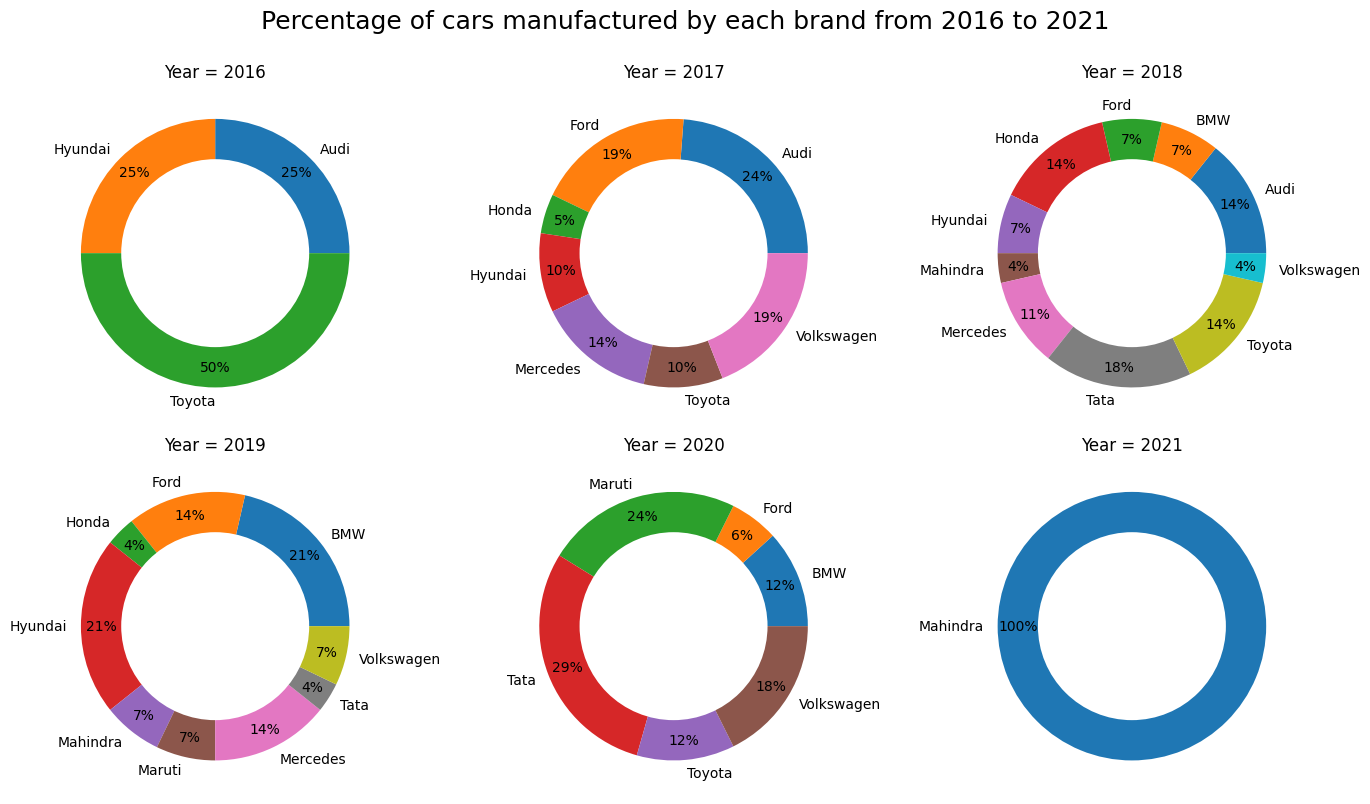

In [ ]:
plt.figure(figsize=(14,8))

for i,year in enumerate(range(2016,2022)):
  # Iterates over each year from 2016 to 2021 using enumerate to get both the index (i) and the year (year).
    plt.subplot(2,3,i+1) #Creates a subplot in a 2x3 grid. This means there will be 6 subplots (2 rows and 3 columns).
    df.loc[df['Year']==year].groupby('Brand').size().plot.pie(autopct="%.0f%%",pctdistance=0.85)
    plt.gca().add_artist(plt.Circle((0,0),radius=0.7,fc="white"))
     #Adds a white circle to the center of each pie chart to improve readability and aesthetics.
    plt.title(f"Year = {year}")
plt.suptitle("Percentage of cars manufactured by each brand from 2016 to 2021",y=1.0,fontsize=18)
plt.tight_layout()
plt.show()

### observation:


1.   In year 2016 50% manufactured is Toyota Brad
2.   In year 2017 Highest manufactured brand is Audi and lowest manufactured
     brand is Honda
3.   In year 2018 Highest manufactured brand is Tata and lowest manufactured   
     brands are mahindra and volkswagen
4.   In year 2019 Highest manufactured brand is BMW and lowest manufactured
     brands are Tata and Honda
5.   In year 2020 Highest Manufactured brand is Tata and lowest manufactured
     brand is Ford
6.   In year 2021 only mahindara brad is manufactured

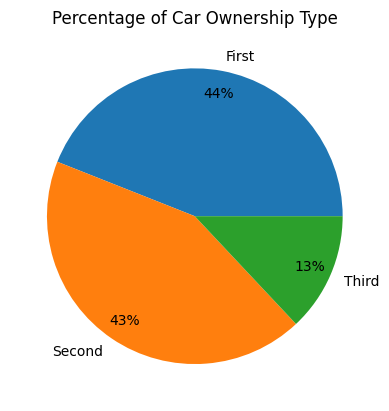

In [ ]:
df['Owner_Type'].value_counts().plot.pie(autopct="%.0f%%",pctdistance=0.85)

plt.title("Percentage of Car Ownership Type")
plt.ylabel("")
plt.show()

In [ ]:
owner=df.groupby(['Owner_Type']).size().reset_index().rename(columns={0:'Count'})
owner=owner.sort_values(by='Count',ascending=False)

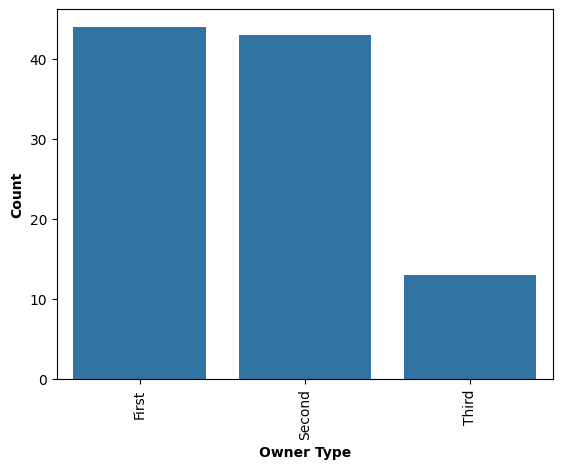

In [ ]:
sns.barplot(x=owner['Owner_Type'],y=owner['Count'],data=owner)
plt.xlabel("Owner Type",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.groupby(['Brand','Owner_Type']).size().reset_index().rename(columns={0:'Count'})

,Brand,Owner_Type,Count
0,Audi,First,7
1,Audi,Second,3
2,BMW,First,3
3,BMW,Second,7
4,Ford,First,3
5,Ford,Second,3
6,Ford,Third,5
7,Honda,First,4
8,Honda,Second,2
9,Hyundai,Second,6


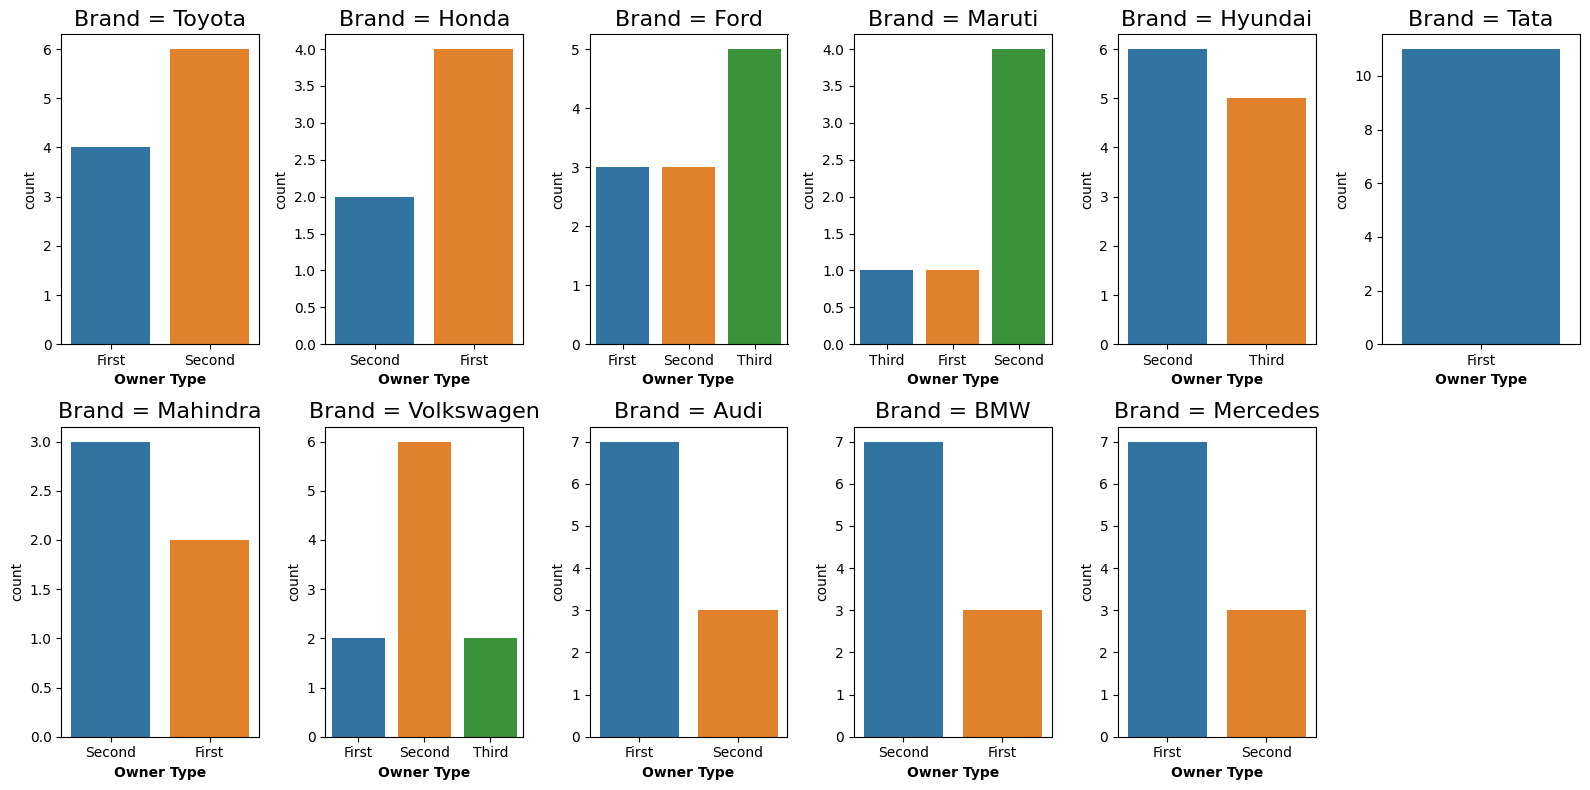

In [ ]:
plt.figure(figsize=(16,8))
for i,brand in enumerate(brands):
    data = df.loc[df['Brand']==brand]
    plt.subplot(2,6,i+1)
    sns.countplot(data=data,x='Owner_Type',hue='Owner_Type')
    plt.title(f"Brand = {brand}",fontsize=16)
    plt.xlabel("Owner Type",fontweight="bold")
plt.tight_layout()
plt.show()

### Observation

1. Ford, maruti and Volkswagen are only that brands their has third owner
2.  Tata has only first ownership



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


# 5. Data Pre-Processing

<Axes: xlabel='Mileage'>

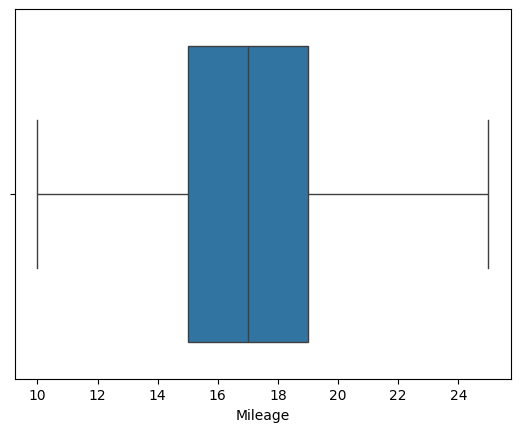

In [ ]:
sns.boxplot(x=df['Mileage'])

In [ ]:
upper_limit=df['Power'].quantile(0.95)
lower_limit=df['Power'].quantile(0.01)
upper_limit,lower_limit

(336.3499999999999, 68.0)

In [ ]:
outliers=df[(df['Power']>upper_limit)|(df['Power']<lower_limit)]
outliers

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
38,Mercedes,GLE,2018,26000,Petrol,Automatic,Second,12,2996,362,5,4000000
50,Ford,Mustang,2019,22000,Petrol,Automatic,First,13,2261,396,4,2700000
76,Mercedes,GLE,2018,26000,Petrol,Automatic,Second,12,2996,362,5,4000000
88,Ford,Mustang,2019,22000,Petrol,Automatic,First,13,2261,396,4,2700000


#6.Encoding the data

In [ ]:

lbl1=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=lbl1.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Brand              100 non-null    int64
 1   Model              100 non-null    int64
 2   Year               100 non-null    int64
 3   Kilometers_Driven  100 non-null    int64
 4   Fuel_Type          100 non-null    int64
 5   Transmission       100 non-null    int64
 6   Owner_Type         100 non-null    int64
 7   Mileage            100 non-null    int64
 8   Engine             100 non-null    int64
 9   Power              100 non-null    int64
 10  Seats              100 non-null    int64
 11  Price              100 non-null    int64
dtypes: int64(12)
memory usage: 9.5 KB


In [ ]:
df.columns

Index(['Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
df['Price']=np.log(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

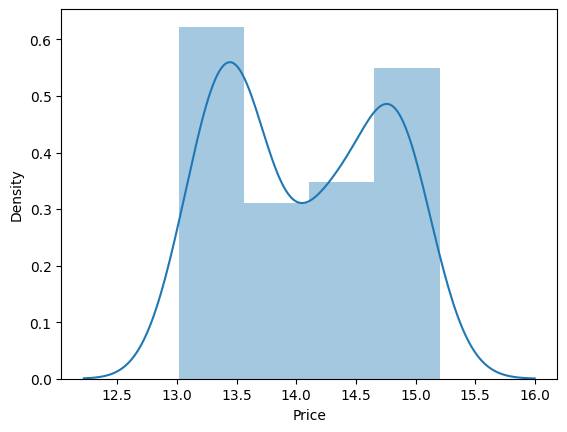

In [ ]:
sns.distplot(df['Price'])

# 6.Splitting the data

In [ ]:
x=df[['Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)
x_train.shape,x_test.shape

((70, 11), (30, 11))

# 7.Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)


0.8830353223318874

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
x_train.shape,x_test.shape

((70, 11), (30, 11))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
r2_score(y_test,y_pred)

0.8683676084307498

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,criterion="absolute_error")
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2_score(y_test,y_pred)

0.9259239498555547

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)
x_train.shape,x_test.shape

((80, 11), (20, 11))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
r2_score(y_test,y_pred1)

0.9500696919874394

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape,x_test.shape

((80, 11), (20, 11))

In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
r2_score(y_test,y_pred)

-84818.23392796615

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape,x_test.shape

((80, 11), (20, 11))

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
r2_score(y_test,y_pred)

0.8721173185930877

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
r2_score(y_test,y_pred)

0.6928517745193848

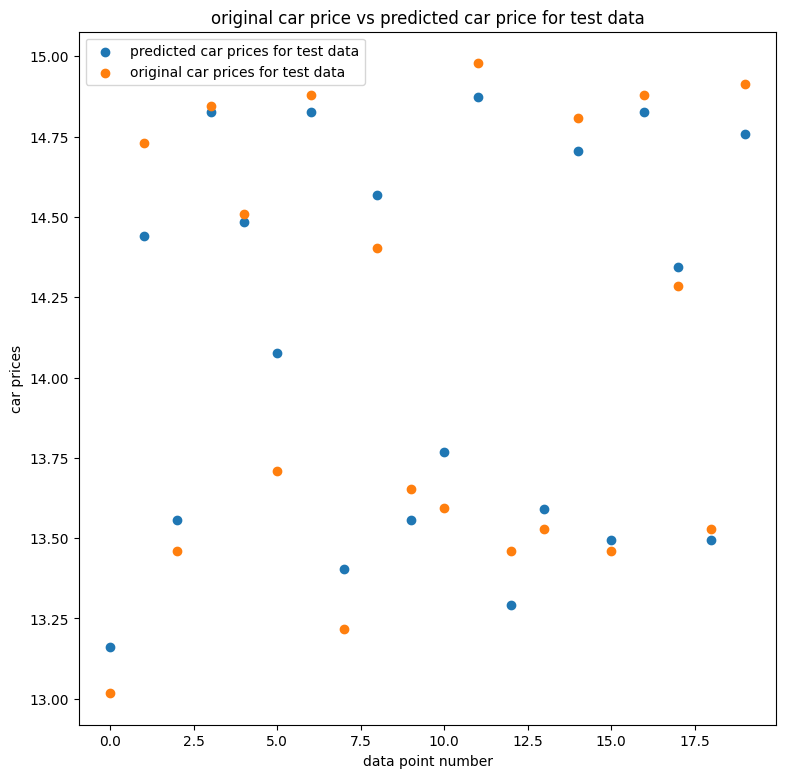

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(range(len(y_pred1)),y_pred1,label='predicted car prices for test data')
plt.scatter(range(len(y_test)),y_test,label='original car prices for test data')
plt.title('original car price vs predicted car price for test data')
plt.xlabel('data point number')
plt.ylabel('car prices')
plt.legend()
plt.show()

# Conclusion: From above graphs, if we ignore few data points, we can say that most of the differences between predicted data points and original data points are lower. So we can use the K-Nearest Neighbours model for given dataset